<a href="https://colab.research.google.com/github/JesusCab/Data-Mining-Python/blob/main/DataMiningTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Mineria De Datos - Jesus Adrian Caballero Nagaya**

1.- Adquisición de datos

2.- Limpieza de datos.

3.- Análisis de datos.

4.- Graficación.

5.- Prueba de hipótesis.

6.- Regresión lineal

7.- Forecasting

8.-Clasificaion

9.-Clustering


# **1.- Adquisición de datos**

In [2]:
import requests
import io
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List
import re
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

def get_soup(url: str) -> BeautifulSoup:
    response = requests.get(url)
    return BeautifulSoup(response.content, 'html.parser')

def get_csv_from_url(url:str) -> pd.DataFrame:
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt='orgtbl'))


df = get_csv_from_url("https://raw.githubusercontent.com/JesusCab/Data-Mining-Python/main/Car_Prices_Poland_Kaggle.csv")
df.head(500)


,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
495,495,opel,antara,NaN,2008,295000,1991,Diesel,Żory,Śląskie,22900
496,496,opel,antara,NaN,2008,212000,1991,Diesel,Piła,Wielkopolskie,18900
497,497,opel,antara,NaN,2009,220122,1991,Diesel,Kraków,Małopolskie,26900
498,498,opel,antara,NaN,2008,172000,2405,Gasoline,Ostrówek,Łódzkie,29900


# **2.- Limpieza de datos.**

In [3]:
df.shape

(117927, 11)

In [5]:
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(87842, 11)

In [14]:
price_table = df["price"]
price_table

0          35900
1          78501
2          27000
3          30800
4          35900
           ...  
117922    222790
117923    229900
117924    135000
117925    154500
117926    130000
Name: price, Length: 87842, dtype: int64

In [13]:
model_frame = pd.DataFrame(data=df['model'])
model_frame

,model
0,combo
1,combo
2,combo
3,combo
4,combo
...,...
117922,xc-90
117923,xc-90
117924,xc-90
117925,xc-90


# **3.- Análisis de datos.**

In [15]:
gender_frame = pd.DataFrame(data=df['price'])
gender_frame 
x=max(price_table)
y=min(price_table)
z= df["price"].mean()
w=df["price"].median()
m = df["price"].mode()
r=df["price"].count()
s=df["price"].sum()
k=df["price"].kurtosis()
v=df["price"].var()
d=df["price"].std()
print("Max {0}\n Min {1}\n Promedio {2}\n Mediana {3}\n moda {4}\n Conteo {5}\n Suma {6}\n Kutosis {7}\n Varianza {8}\n Desviacion Estandar {9}\n".format(x,y,z,w,m,r,s,k,v,d))

Max 2399900
 Min 900
 Promedio 63744.12083058218
 Mediana 37900.0
 moda 0    19900
dtype: int64
 Conteo 87842
 Suma 5599411062
 Kutosis 30.920629610578416
 Varianza 5894975509.403856
 Desviacion Estandar 76778.74386445676



In [16]:
g = df.groupby(['model','mark']).mean()
g

,,Unnamed: 0,year,mileage,vol_engine,price
model,mark,,,,,
2,mazda,97622.500,2011.075893,128518.066964,1411.049107,25803.669643
3,mazda,98054.500,2013.059375,118840.732813,1858.639062,47398.850000
3008,peugeot,109782.500,2015.152961,123283.000000,1587.442434,76473.597039
5,mazda,98502.500,2008.414062,198396.289062,1912.843750,18826.378906
5008,peugeot,110278.500,2013.752604,160301.049479,1710.984375,56839.205729
...,...,...,...,...,...,...
x6,bmw,34838.500,2015.075000,124347.868750,3115.237500,213879.168750
xc-60,volvo,116422.500,2016.440104,120865.558594,2103.890625,135416.653646
xc-90,volvo,117414.500,2016.705078,103758.671875,2074.255859,201558.773438


In [17]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87842 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       87842 non-null  int64 
 1   mark             87842 non-null  object
 2   model            87842 non-null  object
 3   generation_name  87842 non-null  object
 4   year             87842 non-null  int64 
 5   mileage          87842 non-null  int64 
 6   vol_engine       87842 non-null  int64 
 7   fuel             87842 non-null  object
 8   city             87842 non-null  object
 9   province         87842 non-null  object
 10  price            87842 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.0+ MB


# **4.- Graficación.**

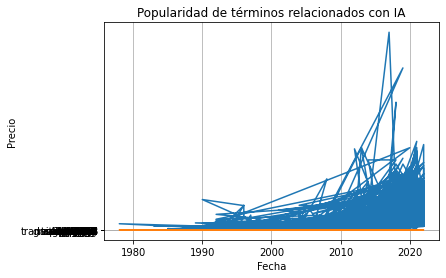

In [18]:
plt.plot(df['year'], df['price'], label='price')
plt.plot(df['year'], df['model'], label='model')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Popularidad de términos relacionados con IA')
plt.grid(True)


In [19]:
m = df['model']
m


0         combo
1         combo
2         combo
3         combo
4         combo
          ...  
117922    xc-90
117923    xc-90
117924    xc-90
117925    xc-90
117926    xc-90
Name: model, Length: 87842, dtype: object

<BarContainer object of 87842 artists>

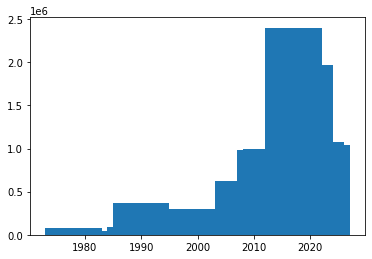

In [20]:
plt.bar(df['year'], df['price'], width=10)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['model'], y=df['price']))

fig.update_layout(
    xaxis=dict(
        title_text='model',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text="price",
        
        titlefont=dict(size=30)
    ),
    title="acumuldado de dinero gastado por modelo de auto"
)

fig.show()

# **5.- Prueba de Hipotesis**

# **6.- Regresión lineal**

In [ ]:
year_table = df["year"]
year_table

0         2015
1         2018
2         2015
3         2016
4         2014
          ... 
117922    2020
117923    2017
117924    2016
117925    2017
117926    2016
Name: year, Length: 117927, dtype: int64

In [ ]:
mileage_table = df["mileage"]
df["mileage"]

0         139568
1          31991
2         278437
3          47600
4         103000
           ...  
117922     40000
117923     51000
117924     83500
117925    174000
117926    189020
Name: mileage, Length: 117927, dtype: int64

In [101]:
mileage_table = df["vol_engine"]
df["vol_engine"]

0         1248
1         1499
2         1598
3         1248
4         1400
          ... 
117922    1969
117923    1969
117924    1969
117925    1969
117926    1969
Name: vol_engine, Length: 117927, dtype: int64

b =  199721.32917071646
m =  [-1403.54021535]
[-2523146.68860972 -2638236.98626849]
140976.78614736235


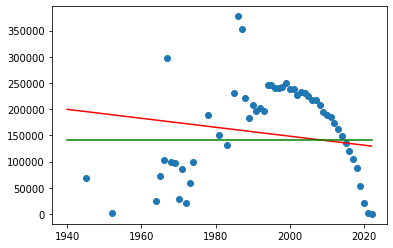

In [198]:
datePrice = pd.DataFrame()
datePrice['year'] = df['year']
datePrice ['mileage']= df['mileage']

datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()
#print(datePrice)

modelo = LinearRegression().fit(datePrice['index'].values.reshape((-1,1)), datePrice['mileage'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)

print(modelo.predict([[1940],[2022]]))
print(df['mileage'].mean())
meanLine = [[df['mileage'].mean()],[df['mileage'].mean()]]

plt.scatter(datePrice['year'], datePrice['mileage'])
plt.plot([[1940],[2022]], modelo.predict([[0],[50]]), color = 'red')
plt.plot([[1940],[2022]], meanLine, color = 'green')



b =  33510.180117157346
m =  [1026.71932678]
[2025345.67406946 2109536.65886538]
70299.88479313474


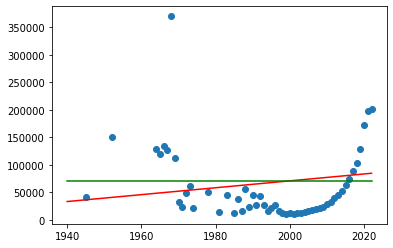

In [209]:
datePrice = pd.DataFrame()
datePrice['year'] = df['year']
datePrice ['price']= df['price']

datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()


modelo = LinearRegression().fit(datePrice['index'].values.reshape((-1,1)), datePrice['price'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)

print(modelo.predict([[1940],[2022]]))
print(df['price'].mean())

meanLine = [[df['price'].mean()],[df['price'].mean()]]

plt.scatter(datePrice['year'], datePrice['price'])
plt.plot([[1940],[2022]], modelo.predict([[0],[50]]), color = 'red')
plt.plot([[1940],[2022]], meanLine, color = 'green')



b =  1551.7640074920596
m =  [33.29477228]
[66143.62222401 68873.79355068]
1812.0577815088996


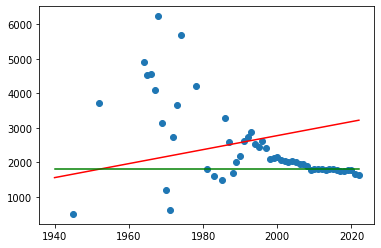

In [218]:
datePrice = pd.DataFrame()
datePrice['year'] = df['year']
datePrice ['vol_engine']= df['vol_engine']

datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()


modelo = LinearRegression().fit(datePrice['index'].values.reshape((-1,1)), datePrice['vol_engine'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)

print(modelo.predict([[1940],[2022]]))
print(df['vol_engine'].mean())

meanLine = [[df['vol_engine'].mean()],[df['vol_engine'].mean()]]

plt.scatter(datePrice['year'], datePrice['vol_engine'])
plt.plot([[1940],[2022]], modelo.predict([[0],[50]]), color = 'red')
plt.plot([[1940],[2022]], meanLine, color = 'green')


# **7.- Forecasting**

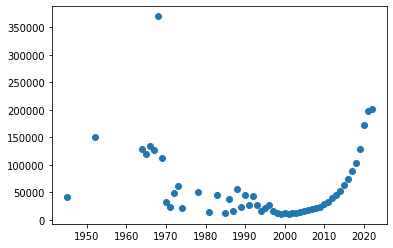

In [215]:
datePrice = pd.DataFrame()
datePrice['year'] = df['year']
datePrice ['price']= df['price']

datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()

modelo = LinearRegression().fit(datePrice['index'].values.reshape((-1,1)), datePrice['price'])

meanLine = [[df['price'].mean()],[df['price'].mean()]]

plt.scatter(datePrice['year'], datePrice['price'])


b =  33510.180117157346
m =  [1026.71932678]
[33510.18011716 84846.14645613]
70299.88479313474


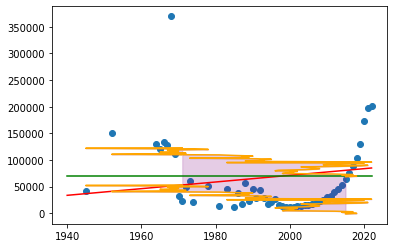

In [227]:
datePrice = pd.DataFrame()
datePrice['year'] = df['year']
datePrice ['price']= df['price']

datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()




results = smf.ols('price~index', datePrice).fit()
predicts = results.predict()

bands = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
coef = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
m = coef.values[1]
b = coef.values[0]
low = bands['[0.025'][0]
hi = bands['0.975]'][0]



lowBand = m * datePrice['index'] + low
highBand = m * datePrice['index'] + hi


b0 = results.params[0]
b1 = results.params[1]
datePrice['prediction'] = b0 + b1*datePrice['price']

modelo = LinearRegression().fit(datePrice['index'].values.reshape((-1,1)), datePrice['price'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)

print(modelo.predict([[0],[50]]))
print(df['price'].mean())

meanLine = [[df['price'].mean()],[df['price'].mean()]]

plt.scatter(datePrice['year'], datePrice['price'])
plt.plot([[1940],[2022]], modelo.predict([[0],[50]]), color = 'red')
plt.plot([[1940],[2022]], meanLine, color = 'green')

plt.plot(datePrice['year'], lowBand, color='orange')
plt.plot(datePrice['year'], highBand, color='orange')
plt.fill_between(datePrice['year'], lowBand, highBand, alpha=0.2, color = 'purple')


b =  199721.32917071646
m =  [-1403.54021535]
[199721.32917072 129544.31840318]
140976.78614736235


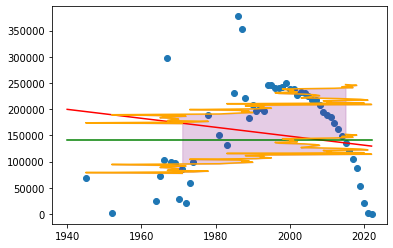

In [228]:
datePrice = pd.DataFrame()
datePrice['year'] = df['year']
datePrice ['mileage']= df['mileage']

datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()


results = smf.ols('mileage~index', datePrice).fit()
predicts = results.predict()

bands = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
coef = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
m = coef.values[1]
b = coef.values[0]
low = bands['[0.025'][0]
hi = bands['0.975]'][0]


lowBand = m * datePrice['index'] + low
highBand = m * datePrice['index'] + hi


b0 = results.params[0]
b1 = results.params[1]
datePrice['prediction'] = b0 + b1*datePrice['mileage']

modelo = LinearRegression().fit(datePrice['index'].values.reshape((-1,1)), datePrice['mileage'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)

print(modelo.predict([[0],[50]]))
print(df['mileage'].mean())

meanLine = [[df['mileage'].mean()],[df['mileage'].mean()]]

plt.scatter(datePrice['year'], datePrice['mileage'])
plt.plot([[1940],[2022]], modelo.predict([[0],[50]]), color = 'red')
plt.plot([[1940],[2022]], meanLine, color = 'green')

plt.plot(datePrice['year'], lowBand, color='orange')
plt.plot(datePrice['year'], highBand, color='orange')
plt.fill_between(datePrice['year'], lowBand, highBand, alpha=0.2, color = 'purple')

# **8.-Clasificacion**

# **9.-Clustering**